In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = '/content/cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
BATCH_SIZE = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [3]:
import shutil

# Create a new folder within test_dir
new_test_folder = os.path.join(test_dir, 'Test_folder')
os.makedirs(new_test_folder)

# Move the original images to the new folder
for filename in os.listdir(test_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        shutil.move(os.path.join(test_dir, filename), os.path.join(new_test_folder, filename))

In [67]:
# 3
# train_image_generator = None
# validation_image_generator = None
# test_image_generator = None

# train_data_gen = None
# val_data_gen = None
# test_data_gen = None

# Define the directories for train, validation, and test sets

# Create image generators for train, validation, and test sets
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Generate data flow from directories for train, validation, and test sets
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Generate data flow from directory for the updated test_dir
# test_data_gen = test_image_generator.flow_from_directory(
#     test_dir,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     batch_size=1,
#     class_mode=None,
#     shuffle=False
# )

test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=50,
    class_mode="binary",
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


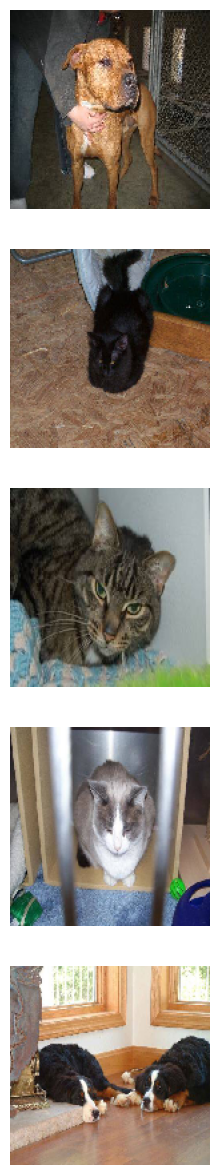

In [68]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog " + str(probability))
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat" + str(probability))
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
sample_training_images, _ = next(test_data_gen)
sample_training_images2, _ = next(train_data_gen)
print(sample_training_images.shape)
print(sample_training_images2.shape)
plotImages(sample_training_images[:5])

In [7]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


Found 2000 images belonging to 2 classes.


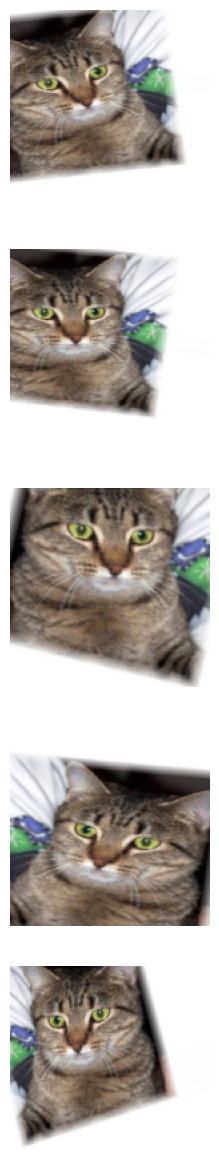

In [8]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [11]:
# 7
input_shape =(IMG_HEIGHT, IMG_WIDTH, 3)
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
    ])


model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [65]:
# 8
# history = None
# history = model.fit(train_data=train_data_gen, val_data= val_data_gen, batch_size=BATCH_SIZE, epochs=epochs)
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // BATCH_SIZE,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // BATCH_SIZE
)


Epoch 1/15
15/15 [==============================] - 129s 9s/step - loss: 0.5713 - accuracy: 0.7014 - val_loss: 0.5696 - val_accuracy: 0.6886
Epoch 2/15
15/15 [==============================] - 127s 9s/step - loss: 0.5314 - accuracy: 0.7334 - val_loss: 0.5331 - val_accuracy: 0.7154
Epoch 3/15
15/15 [==============================] - 128s 9s/step - loss: 0.4793 - accuracy: 0.7692 - val_loss: 0.5481 - val_accuracy: 0.7288
Epoch 4/15
15/15 [==============================] - 135s 9s/step - loss: 0.4842 - accuracy: 0.7676 - val_loss: 0.5168 - val_accuracy: 0.7411
Epoch 5/15
15/15 [==============================] - 134s 9s/step - loss: 0.4401 - accuracy: 0.7906 - val_loss: 0.5436 - val_accuracy: 0.7310
Epoch 6/15
 1/15 [=>............................] - ETA: 1:59 - loss: 0.3962 - accuracy: 0.8594

KeyboardInterrupt: ignored

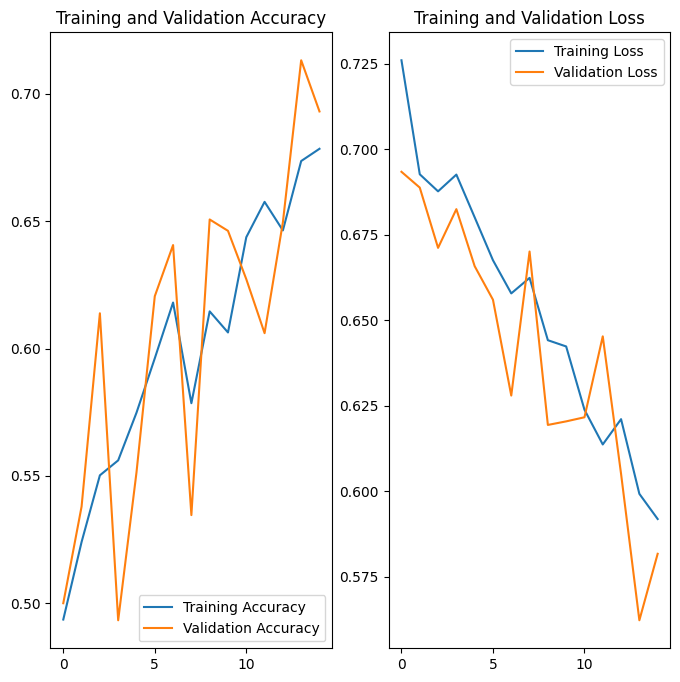

In [66]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [69]:
# 10
test_images, _ = next(test_data_gen)
test_images = test_images[:50]

# Get the predictions for the test images
probabilities = model.predict(test_images)

# Plot the test images with their probabilities
plotImages(test_images, probabilities)


Output hidden; open in https://colab.research.google.com to view.

In [70]:
# If probability > 0.5 == dog
# Else cat
print(probabilities)

[[0.69732106]
 [0.04769691]
 [0.02899954]
 [0.8480448 ]
 [0.4138679 ]
 [0.4815329 ]
 [0.31978953]
 [0.06926672]
 [0.90058005]
 [0.9924826 ]
 [0.03301268]
 [0.8060324 ]
 [0.1065603 ]
 [0.06506106]
 [0.7121466 ]
 [0.94861704]
 [0.8606354 ]
 [0.9769961 ]
 [0.80381083]
 [0.935805  ]
 [0.11324102]
 [0.03385062]
 [0.44491076]
 [0.8684351 ]
 [0.31095272]
 [0.4645391 ]
 [0.87333655]
 [0.08987416]
 [0.04814622]
 [0.6455948 ]
 [0.06572267]
 [0.06483996]
 [0.53937614]
 [0.9999724 ]
 [0.07073158]
 [0.8185686 ]
 [0.99975467]
 [0.7211679 ]
 [0.05925629]
 [0.1717095 ]
 [0.5766964 ]
 [0.43327567]
 [0.9865962 ]
 [0.93341655]
 [0.26386216]
 [0.29084074]
 [0.41811895]
 [0.05204922]
 [0.28932637]
 [0.19858032]]


In [72]:
# 11
import numpy as np

answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  # print(f"Answer: {answer}, Probability: {np.round(probability)}")
  if np.round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 84.0% of the images of cats and dogs.
You passed the challenge!
